
# 23S1-AI6124 Stock Trading Project Assignment
Created by A/Prof Kai Keng ANG (kkang@i2r.a-star.edu.sg, kkang@ntu.edu.sg). Last modified 30 Aug 2023

Submitted by: Daeun Kang Mat ID: G2303956A

# Instructions
Enter your name according to NTU Learn, and your student ID above. Do not include the square brackets. Please save the file as Project_[Student name].ipynb and submit in NTU Learn.


## Objective

After completing this project, you will know:

Part 1: (Code provided)
* How to download any stock prices to work on
* How to compute buy sell signals on the stock
* How to measure portfolio performance from profit and loss based on buy and sell signals on the stock

Part 2: (To be coded by student)
* How to choose parameters to optimize profits, and explore different trading strategies
* How to apply computational intelligent methods to choose parameters of trading strategies on training data set, then apply to test data set
* How to benchmark the portfolio performance of  computational intelligent methods

Part 3: (To be coded by student)
* How to apply computational intelligent methods to measure the performance of the prediction
* How to interpret and explain the computational intelligent method in predicting the stock prices
* How to apply the stock price prediction to help increase profits, and benchmark the portfolio performance with and without prediction

Code for part 1 of first 3 objectives listed above are provide for you to kick start your project. You will have to complete part 2 and part 3 for the project.


## Reference

Ang, K. K., & Quek, C. (2006). Stock Trading Using RSPOP: A Novel Rough Set-Based Neuro-Fuzzy Approach. IEEE Trans. Neural Netw., 17(5), 1301-1315. doi:http://dx.doi.org/10.1109/TNN.2006.875996

## Introduction

First we install the yahoo finance library

This library is used to download stock prices into pandas data frame.

In [1]:
!pip install pandas
!pip install yfinance
!pip install yahoofinancials
!pip install mpld3


Then we import the necessary libraries

In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from yahoofinancials import YahooFinancials
%matplotlib inline
import mpld3
mpld3.enable_notebook()

# 1. Stock prices

Pick a Singapore trust stock price to download. Do not pick just any stocks. An example is Real Estate Investment Trust (REIT). You will need the symbol, such as Keppel REIT (K71U.SI). You can look up the symbol from https://sg.finance.yahoo.com/lookup. The following is how you can download the historical prices of a REIT.

In [3]:
stock_df = yf.download('ME8U.SI')
stock_df.head()

[*********************100%%**********************]  1 of 1 completed


Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2010-10-21  1.139132  1.188660  1.139132  1.149038   0.518184  348314527
2010-10-22  1.149038  1.158943  1.099510  1.099510   0.495849  113018003
2010-10-25  1.099510  1.109416  1.069794  1.079699   0.486914   75151167
2010-10-26  1.079699  1.089605  1.040077  1.089605   0.491382   79694097
2010-10-27  1.089605  1.099510  1.069794  1.089605   0.491382   37594260

Alternatively, you can also use the ticker function to download the stock price. Ticker also allows you to download additional data. After you downloaded the stock price, you can also plot the data.

<AxesSubplot:title={'center':"Mapletree Industrial Trust's price"}, xlabel='Date'>

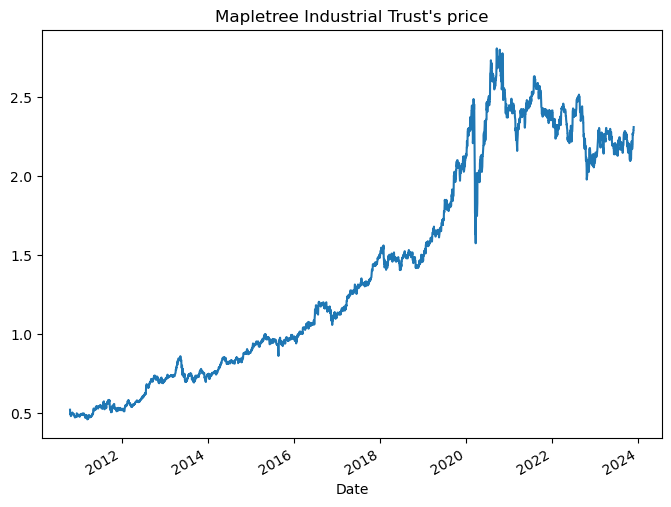

In [4]:
ticker = yf.Ticker('ME8U.SI')
stock_df = ticker.history(period="max")
figure(figsize=(8, 6))
stock_df['Close'].plot(title="Mapletree Industrial Trust's price")

In [5]:
stock_df.head()

Open      High       Low     Close     Volume  \
Date                                                                           
2010-10-21 00:00:00+08:00  0.513717  0.536053  0.513717  0.518184  348314527   
2010-10-22 00:00:00+08:00  0.518184  0.522651  0.495848  0.495848  113018003   
2010-10-25 00:00:00+08:00  0.495849  0.500316  0.482448  0.486914   75151167   
2010-10-26 00:00:00+08:00  0.486914  0.491382  0.469046  0.491382   79694097   
2010-10-27 00:00:00+08:00  0.491382  0.495848  0.482447  0.491382   37594260   

                           Dividends  Stock Splits  
Date                                                
2010-10-21 00:00:00+08:00        0.0           0.0  
2010-10-22 00:00:00+08:00        0.0           0.0  
2010-10-25 00:00:00+08:00        0.0           0.0  
2010-10-26 00:00:00+08:00        0.0           0.0  
2010-10-27 00:00:00+08:00        0.0           0.0

# 2. Computing trade signals

There are different types of moving averages, such as simple moving average, weighted moving average or exponential moving average. The
difference between the types is how the average is computed based on the weight assigned to data points. Simple moving average can be computed by simply taking the mean of the data points. The period to compute the moving average is a parameter. You can have a 200 days simple moving average, a 5 days simple moving average etc. Here' we compute a fast 20 days and slow 100 days moving average on the close price.

In [6]:
df=stock_df
# create 20 days simple moving average column
df['Fast_SMA'] = df['Close'].rolling(window = 20, min_periods = 1).mean()
# create 50 days simple moving average column
df['Slow_SMA'] = df['Close'].rolling(window = 100, min_periods = 1).mean()
# display first few rows
df.head()

Open      High       Low     Close     Volume  \
Date                                                                           
2010-10-21 00:00:00+08:00  0.513717  0.536053  0.513717  0.518184  348314527   
2010-10-22 00:00:00+08:00  0.518184  0.522651  0.495848  0.495848  113018003   
2010-10-25 00:00:00+08:00  0.495849  0.500316  0.482448  0.486914   75151167   
2010-10-26 00:00:00+08:00  0.486914  0.491382  0.469046  0.491382   79694097   
2010-10-27 00:00:00+08:00  0.491382  0.495848  0.482447  0.491382   37594260   

                           Dividends  Stock Splits  Fast_SMA  Slow_SMA  
Date                                                                    
2010-10-21 00:00:00+08:00        0.0           0.0  0.518184  0.518184  
2010-10-22 00:00:00+08:00        0.0           0.0  0.507016  0.507016  
2010-10-25 00:00:00+08:00        0.0           0.0  0.500316  0.500316  
2010-10-26 00:00:00+08:00        0.0           0.0  0.498082  0.498082  
2010-10-27 00:00:00+08:00        0.0           0.0  0.496742  0.496742

There many moving average strategies that can be developed to generate trade signals. here we will use a simple moving average crossover strategy based on the SMAs we computed. A moving average can be use to indicate price trends. A crossover occurs when a faster or shorter moving average, such as the 20 days SMA crosses a slower or longer moving average, such as the 100 days SMA. This crossover  point can be used as a  indicator to buy or sell a stock.

First we create a new column ‘Signal’ such that if Fast_SMA is greater than Slow_SMA then set to 1 else set to 0.


In [7]:
df['Signal'] = 0.0
df['Signal'] = np.where(df['Fast_SMA'] > df['Slow_SMA'], 1.0, 0.0)

We now need to generate the buy and sell from the ‘Signal’ values. Crossover happens when the Fast_SMA and the Slow_SMA cross,  the ‘Signal’ changes from 0 to 1, or from 1 to 0. Thus we can just create a ‘Position’ value to indicate a day-to-day difference of the ‘Signal’ column.

‘Position’ = 1 implies that Signal changed from 0 to 1, meaning a faster moving average has crossed a slower moving average. This indicates a bull or up trend in the price and thus this is a buy signal.

‘Position’ = -1 implies that  Signal changed from 1 to 0, meaning a faster moving average has crossed below a slower moving average. This indicates a bear or down trend in the price and thus this is a sell signal.

In [8]:
df['Position'] = df['Signal'].diff()
# Need to set the first row of Position to 0. Otherwise it is nan from diff function.
df['Position'].iloc[0]=0
# display first few rows
df.head()


C:\Users\darki\AppData\Local\Temp\ipykernel_29572\394523951.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Position'].iloc[0]=0


Open      High       Low     Close     Volume  \
Date                                                                           
2010-10-21 00:00:00+08:00  0.513717  0.536053  0.513717  0.518184  348314527   
2010-10-22 00:00:00+08:00  0.518184  0.522651  0.495848  0.495848  113018003   
2010-10-25 00:00:00+08:00  0.495849  0.500316  0.482448  0.486914   75151167   
2010-10-26 00:00:00+08:00  0.486914  0.491382  0.469046  0.491382   79694097   
2010-10-27 00:00:00+08:00  0.491382  0.495848  0.482447  0.491382   37594260   

                           Dividends  Stock Splits  Fast_SMA  Slow_SMA  \
Date                                                                     
2010-10-21 00:00:00+08:00        0.0           0.0  0.518184  0.518184   
2010-10-22 00:00:00+08:00        0.0           0.0  0.507016  0.507016   
2010-10-25 00:00:00+08:00        0.0           0.0  0.500316  0.500316   
2010-10-26 00:00:00+08:00        0.0           0.0  0.498082  0.498082   
2010-10-27 00:00:00+08:00        0.0           0.0  0.496742  0.496742   

                           Signal  Position  
Date                                         
2010-10-21 00:00:00+08:00     0.0       0.0  
2010-10-22 00:00:00+08:00     0.0       0.0  
2010-10-25 00:00:00+08:00     0.0       0.0  
2010-10-26 00:00:00+08:00     0.0       0.0  
2010-10-27 00:00:00+08:00     0.0       0.0

<AxesSubplot:xlabel='Date'>

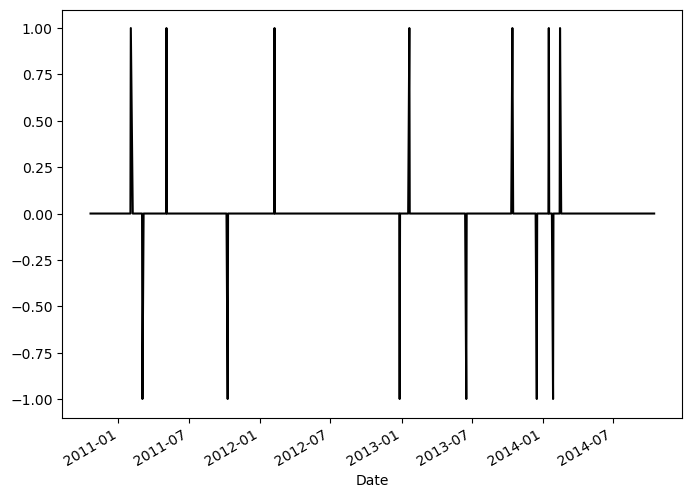

In [9]:
# Plot the positions
plt.figure(figsize = (8,6))
df.iloc[0:1000]['Position'].plot(color = 'k', label= 'Position')


Next we need to change the position signal to trade signals. Although position can give us this information, we want the change in the trade signal, which is the change from -1 to 1 to indicate a buy, and 1 to -1 to indicate a sell. This is for computing the Multiplicative Portfolio Returns.

0.0


<AxesSubplot:xlabel='Date'>

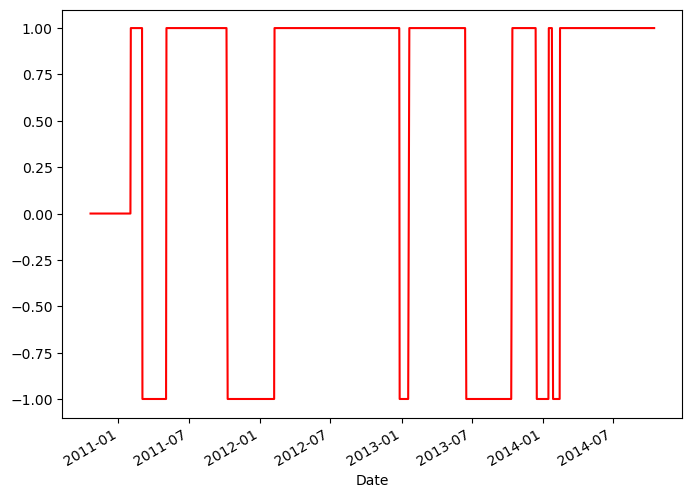

In [10]:
plt.figure(figsize = (8,6))
df['Trade'] = df['Position']
prevrow = df.iloc[0]
print(prevrow['Position'])
for index, row in df.iloc[1:].iterrows():
  if row['Trade']==0:
    if prevrow['Trade']!=0:
      df.at[index,'Trade']=prevrow['Trade']
      row['Trade']=prevrow['Trade']
  prevrow=row
df.iloc[0:1000]['Trade'].plot(color = 'r', label= 'Trade')

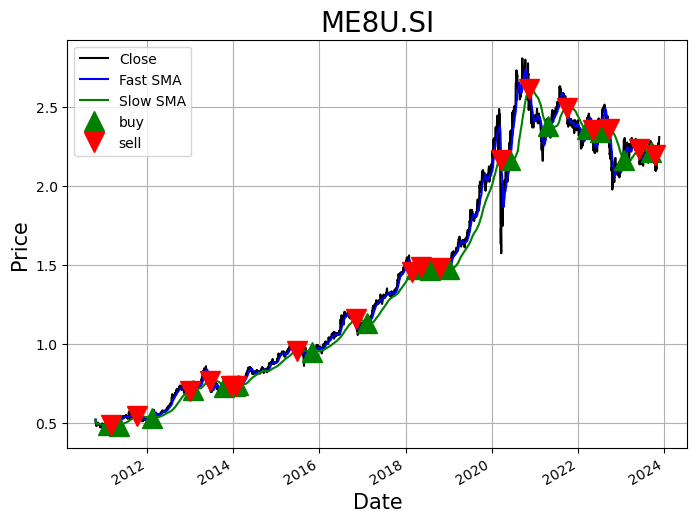

In [11]:
# plot close price, Fast and Slow simple moving averages
def plotprice(df):
  plt.figure(figsize = (8,6))
  df['Close'].plot(color = 'k', label= 'Close')
  df['Fast_SMA'].plot(color = 'b', label = 'Fast SMA')
  df['Slow_SMA'].plot(color = 'g', label = 'Slow SMA')
  # plot buy signals
  plt.plot(df[df['Position'] == 1].index, df['Fast_SMA'][df['Position'] == 1], '^', markersize = 15, color = 'g', label = 'buy')
  # plot sell signals
  plt.plot(df[df['Position'] == -1].index, df['Fast_SMA'][df['Position'] == -1], 'v', markersize = 15, color = 'r', label = 'sell')
  plt.ylabel('Price', fontsize = 15 )
  plt.xlabel('Date', fontsize = 15 )
  plt.title('ME8U.SI', fontsize = 20)
  plt.legend()
  plt.grid()
  plt.show()

plotprice(df)

It is not very clear in the plot above since it included the prices of many years. Lets zoom in to take a closer look.

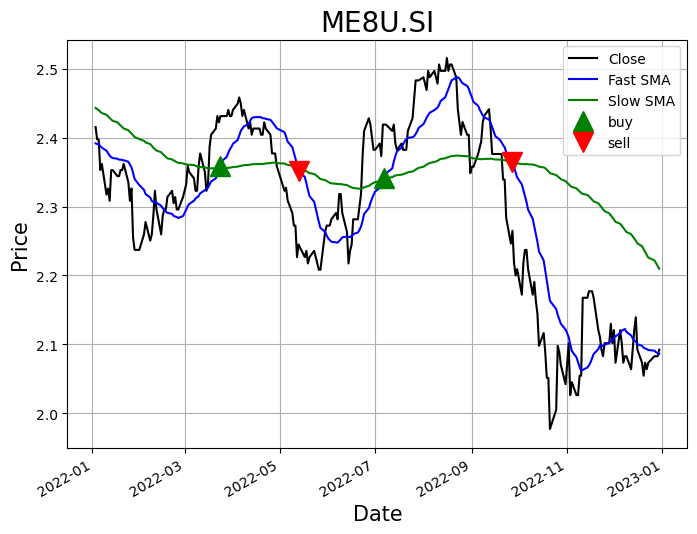

In [12]:
sdf=df.loc['2022-01-01':'2022-12-31']
plotprice(sdf)


Notice that there is a buy at Apr 2009, but the buy and sell are performed at almost the same price at around May 2010. Since each trade incurs a transaction cost, trades at around the same price will result in losses. Hence a better trading strategy can be implemented, such as the introduction of a moving average band to reduce the number of trades around the same price. Refer to the paper on this for more details.

# 3. Computing portfolio returns

The computation of portfolio returns in this section is based on the multiplicative returns given by (refer equation 11 of the reference paper)

$\begin{equation}
R(T)=\{1+F(T-1)r(T)\}\{1-\delta|F(T)-F(T-1)|\}
\end{equation}$

where $r(T)=(y(T)/y(T-1))-1$; $y(T)$ is the closing price at time $T$; $F(T)$ is the action from the trading system; and $\delta$ is the transaction rate.

The multplicative profits $R$ can computed using

$\begin{equation}
R=\prod\limits_{T = 1}^{n} R(T)
\end{equation}$

where $n$ is the total number of time points.


0.0


<AxesSubplot:xlabel='Date'>

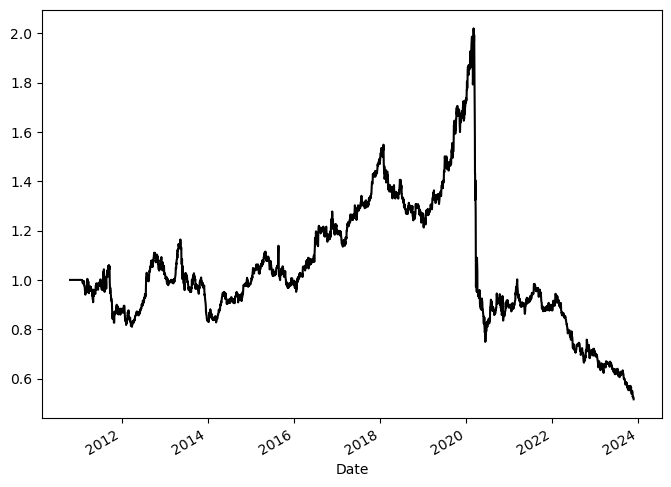

In [13]:
df['Returns']=1.0
print(df.iloc[1]['Trade'])

def computereturns(tdf,trate):
  prevrow = tdf.iloc[0]
  returncol=tdf.columns.get_loc('Returns')
  for i in range(len(tdf)):
    if i==0:
      prev_i=i
    else:
      prevrow=tdf.iloc[prev_i]
      row=tdf.iloc[i]
      rt=(row['Close']/prevrow['Close'])-1
      t=prevrow['Returns']*(1+prevrow['Trade']*rt)*(1-trate*abs(row['Trade']-prevrow['Trade']))
      tdf.iat[i,returncol]=t
      prev_i=i
  return tdf

df=computereturns(df,0.005)
plt.figure(figsize = (8,6))
df['Returns']
# df.iloc[1:1000]['Returns'].plot(color = 'k', label= 'Returns')
df['Returns'].plot(color = 'k', label= 'Returns')


Notice in the above plot that some times the portfolio returns dropped below 1.0, some times it rises above 2.0. Hence this shows that the choice of trading strategy and parameters are very important to yield either profits or losses. Above 1.0 indicates there is overall profit. Less than 1.0 indicates there is a loss.


# 4. Benchmark Algorithm
## Long Short-Term Memory Network

The LSTM network, a variant of deep Recurrent Neural Network (RNN), consists of Long Short-Term Memory units.RNN is a deep learning architecture characterized by internal feedback connections among neurons. These internal feedback mechanisms facilitate the retention of important historical events and the integration of past experiences. In contrast to a conventional fully connected feedforward network, RNN employs shared parameters throughout the model, allowing for generalization to sequence lengths that were not encountered during the training phase. Nevertheless, RNN encounters challenges in learning extended time dependencies that extend beyond a few time steps. As the number of considered time steps grows, information from past events diminishes exponentially. To address this long-term dependency issue, LSTM has been introduced. LSTM networks have the capability to retain information from more than 1000 time steps, allowing them to handle much longer sequences compared to basic RNNs. This scalability overcomes the inherent limitations of simple RNNs, and as a result, LSTM has become widely adopted in various sequential modeling tasks today.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
import math
import itertools
from sklearn import preprocessing
import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt

from __future__ import print_function
import math
#importing keras modules
from keras.models import Sequential
from keras.layers import Dense, Activation ,Dropout , Flatten , Conv1D , MaxPooling1D
from keras.layers import LSTM
from keras import losses
from keras import optimizers
from timeit import default_timer as timer

C:\Users\darki\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [15]:
ticker = yf.Ticker('ME8U.SI')
lstm_df = ticker.history(period="max")
lstm_df

Open      High       Low     Close     Volume  \
Date                                                                           
2010-10-21 00:00:00+08:00  0.513717  0.536053  0.513717  0.518184  348314527   
2010-10-22 00:00:00+08:00  0.518184  0.522651  0.495849  0.495849  113018003   
2010-10-25 00:00:00+08:00  0.495848  0.500316  0.482447  0.486914   75151167   
2010-10-26 00:00:00+08:00  0.486914  0.491382  0.469046  0.491382   79694097   
2010-10-27 00:00:00+08:00  0.491382  0.495849  0.482448  0.491382   37594260   
...                             ...       ...       ...       ...        ...   
2023-11-17 00:00:00+08:00  2.250000  2.270000  2.240000  2.270000    3215400   
2023-11-20 00:00:00+08:00  2.270000  2.280000  2.250000  2.270000    2367400   
2023-11-21 00:00:00+08:00  2.270000  2.300000  2.270000  2.290000    5364400   
2023-11-22 00:00:00+08:00  2.290000  2.300000  2.260000  2.290000    4096400   
2023-11-23 00:00:00+08:00  2.280000  2.320000  2.270000  2.310000    4559600   

                           Dividends  Stock Splits  
Date                                                
2010-10-21 00:00:00+08:00        0.0           0.0  
2010-10-22 00:00:00+08:00        0.0           0.0  
2010-10-25 00:00:00+08:00        0.0           0.0  
2010-10-26 00:00:00+08:00        0.0           0.0  
2010-10-27 00:00:00+08:00        0.0           0.0  
...                              ...           ...  
2023-11-17 00:00:00+08:00        0.0           0.0  
2023-11-20 00:00:00+08:00        0.0           0.0  
2023-11-21 00:00:00+08:00        0.0           0.0  
2023-11-22 00:00:00+08:00        0.0           0.0  
2023-11-23 00:00:00+08:00        0.0           0.0  

[3287 rows x 7 columns]

In [16]:
#Drop unnecessary columns and only retain 'Open', 'High', 'Low', 'Close'
lstm_df.drop(lstm_df.columns[[4,5,6]], axis=1, inplace=True)
#Scaling
lstm_data = lstm_df.to_numpy()/10
lstm_data

array([[0.0513717 , 0.05360528, 0.0513717 , 0.05181843],
       [0.05181843, 0.05226513, 0.04958486, 0.04958486],
       [0.04958483, 0.05003157, 0.04824473, 0.04869142],
       ...,
       [0.227     , 0.23      , 0.227     , 0.229     ],
       [0.229     , 0.23      , 0.226     , 0.229     ],
       [0.228     , 0.23199999, 0.227     , 0.23099999]])

In [17]:
# Initialize an empty list to store sequences
result = []

# Define the length of each sequence
sequence_length = 6

# Loop through the input data to create sequences
for index in range(len(lstm_data) - sequence_length):
    # Append sequences of length 'sequence_length' to the result list
    result.append(lstm_data[index: index + sequence_length])

# Convert the result list to a NumPy array
result = np.array(result)

# Calculate the row index for splitting the data into training and testing sets
row = round(0.8 * result.shape[0])

# Create the training data by selecting the first 'row' rows from the result
train = result[:int(row), :]

# Split the training data into input features (x_train) and target variable (y_train)
x_train = train[:, :-1]
y_train = train[:, -1][:, -1]

# Create the testing data by selecting rows from 'row' to the end of the result
x_test = result[int(row):, :-1]
y_test = result[int(row):, -1][:, -1]

# Determine the number of features in the LSTM data
amount_of_features = len(lstm_df.columns)

# Reshape the training and testing data to fit the LSTM model input shape
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))

# Print the shapes of the training and testing data
print("X_train", x_train.shape)
print("y_train", y_train.shape)
print("X_test", x_test.shape)
print("y_test", y_test.shape)


X_train (2625, 5, 4)
y_train (2625,)
X_test (656, 5, 4)
y_test (656,)


In [18]:
def build_model(layers):
# Set the dropout rate
        d = 0.2
    
    
        model = Sequential()
        model.add(LSTM(128, input_shape=(layers[1], layers[0]), return_sequences=True))
        model.add(LSTM(32, input_shape=(layers[1], layers[0]), return_sequences=False))
        
# Add a dropout layer to prevent overfitting
        model.add(Dropout(d))
        model.add(Dense(16, activation="relu", kernel_initializer="uniform"))
        
        model.add(Dense(1, activation="relu", kernel_initializer="uniform"))
        model.compile(loss='mse',optimizer='adam',metrics=['mae'])
        
        return model

In [19]:
model = build_model([4,5,1])
#Summary of the Model
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 128)            68096     
                                                                 
 lstm_1 (LSTM)               (None, 32)                20608     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 16)                528       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 89249 (348.63 KB)
Trainable params: 89249 (348.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [20]:
history = model.fit(x_train, y_train, batch_size=128,  epochs=35, validation_split=0.2,
                    verbose=2)

Epoch 1/35
17/17 - 6s - loss: 0.0080 - mae: 0.0832 - val_loss: 0.0343 - val_mae: 0.1824 - 6s/epoch - 332ms/step
Epoch 2/35
17/17 - 0s - loss: 0.0022 - mae: 0.0385 - val_loss: 0.0070 - val_mae: 0.0788 - 275ms/epoch - 16ms/step
Epoch 3/35
17/17 - 0s - loss: 8.7138e-04 - mae: 0.0241 - val_loss: 0.0112 - val_mae: 0.1021 - 267ms/epoch - 16ms/step
Epoch 4/35
17/17 - 0s - loss: 6.7785e-04 - mae: 0.0223 - val_loss: 0.0096 - val_mae: 0.0944 - 284ms/epoch - 17ms/step
Epoch 5/35
17/17 - 0s - loss: 5.3297e-04 - mae: 0.0195 - val_loss: 0.0054 - val_mae: 0.0703 - 266ms/epoch - 16ms/step
Epoch 6/35
17/17 - 0s - loss: 3.2773e-04 - mae: 0.0151 - val_loss: 0.0019 - val_mae: 0.0403 - 259ms/epoch - 15ms/step
Epoch 7/35
17/17 - 0s - loss: 8.0392e-05 - mae: 0.0068 - val_loss: 8.5573e-05 - val_mae: 0.0063 - 259ms/epoch - 15ms/step
Epoch 8/35
17/17 - 0s - loss: 4.9220e-05 - mae: 0.0051 - val_loss: 9.8601e-05 - val_mae: 0.0070 - 285ms/epoch - 17ms/step
Epoch 9/35
17/17 - 0s - loss: 4.7040e-05 - mae: 0.0048 - v

The validation_split parameter in the model.fit function designates a fraction of the training data (in this case, 20%) to serve as a validation set during the training process. This allows continual monitoring of the model's generalization to unseen data, facilitating the identification of overfitting or underfitting.

In [21]:
trainScore = model.evaluate(x_train, y_train, verbose=0)
testScore = model.evaluate(x_test, y_test, verbose=0)

p = model.predict(x_test)
p1 = model.predict(x_train)

83/83 [==============================] - 0s 4ms/step


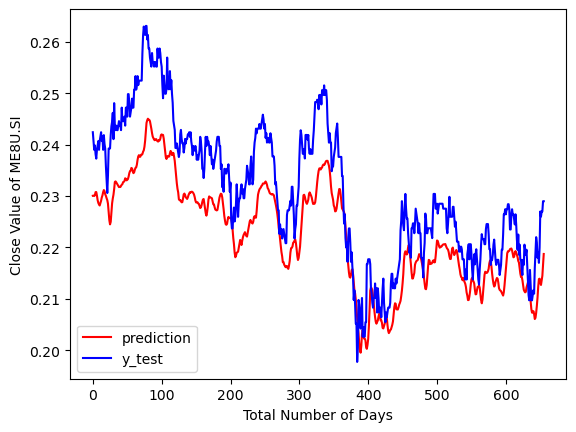

In [22]:
plt.plot(p,color='red', label='prediction')
plt.plot(y_test,color='blue', label='y_test')
plt.xlabel('Total Number of Days')
plt.ylabel('Close Value of ME8U.SI')
plt.legend(loc='lower left')
plt.show()

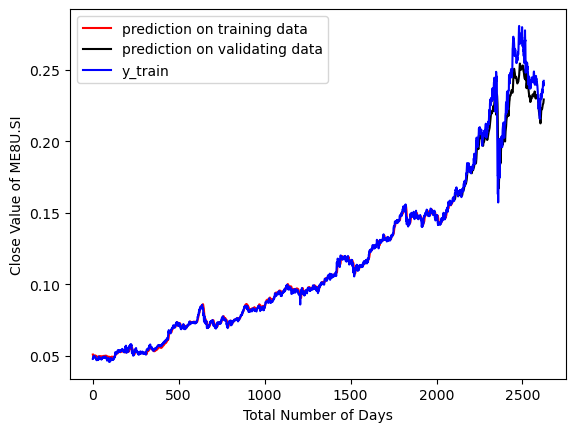

In [23]:
plt.plot(p1[:2100],color='red', label='prediction on training data')
x = np.array(range(2100,2625))
plt.plot(x,p1[2100:],color = 'black',label ='prediction on validating data')
plt.plot(y_train,color='blue', label='y_train')
plt.xlabel('Total Number of Days')
plt.ylabel('Close Value of ME8U.SI')
plt.legend(loc='upper left')
plt.show()

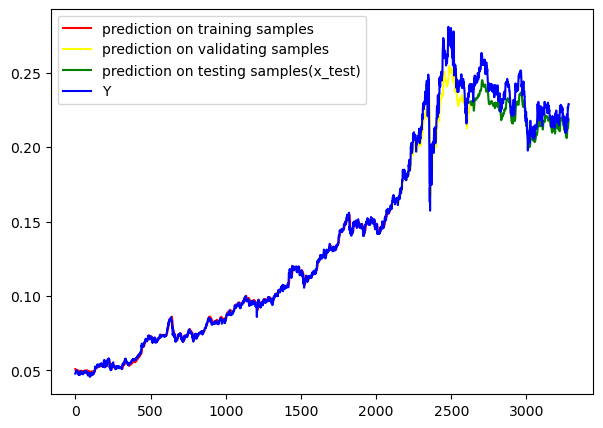

In [24]:
Y = np.concatenate((y_train,y_test),axis = 0)
P = np.concatenate((p1,p),axis = 0)
#plotting the complete Y set with predicted values on x_train and x_test(variable p1 & p respectively given above)
#for 
plt.plot(P[:2100],color='red', label='prediction on training samples')
#for validating samples
z = np.array(range(2100,2625))
plt.plot(z,P[2100:2625],color = 'yellow',label ='prediction on validating samples')
#for testing samples
x = np.array(range(2625,3281))
plt.plot(x,P[2625:],color = 'green',label ='prediction on testing samples(x_test)')
plt.plot(Y,color='blue', label='Y')
plt.legend(loc='upper left')
fig = plt.gcf()
fig.set_size_inches(7, 5)
plt.show()

In [25]:
from sklearn.metrics import mean_absolute_error

In [26]:
y = y_test * 10
y_pred = p.reshape(656)
y_pred = y_pred * 10

In [27]:

print('Trainscore RMSE \tTrain Mean abs Error \tTestscore Rmse \t Test Mean abs Error')
print('%.9f \t\t %.9f \t\t %.9f \t\t %.9f' % (math.sqrt(trainScore[0]),trainScore[1],math.sqrt(testScore[0]),testScore[1]))

Trainscore RMSE 	Train Mean abs Error 	Testscore Rmse 	 Test Mean abs Error
0.005630179 		 0.002871234 		 0.009856675 		 0.008719271


In [28]:
print('mean absolute error \t mean absolute percentage error')
print(' %.9f \t\t\t %.9f' % (mean_absolute_error(y,y_pred),(np.mean(np.abs((y - y_pred) / y)) * 100)))

mean absolute error 	 mean absolute percentage error
 0.087192714 			 3.698271840


# 5. Hybrid Algorithm
## Genetic Algorithm-Optimized Long Short-Term Memory Network[1]
[1] H. Chung and K. Shin, “Genetic algorithm-optimized long short-term memory network for stock market prediction,” Sustainability, vol. 10, no. 10, p. 3765, 2018. doi:10.3390/su10103765 

## 5.1 Literature Review

In this journal, H.Chung and K.Shin have proposed a hybrid methodology that integrates the long short-term memory (LSTM) network with a genetic algorithm (GA). 

Traditionally, the determination of the time window size and architectural parameters of the LSTM network has relied on trial-and-error approaches based on heuristics. This study diverges from this conventional practice by delving into the temporal properties of stock market data and putting forth a systematic methodology that utilizes the genetic algorithm to discern the optimal time window size and topology for the LSTM network.

Genetic Algorithm (GA) is a metaheuristic and stochastic optimization algorithm inspired by natural evolution, widely employed for finding near-optimal solutions in problems with large search spaces. GA operates through the principles of crossover and mutation, with a population of "chromosomes" representing potential solutions expressed as binary strings. The six-stage process of GA involves initialization, fitness calculation, termination condition check, selection, crossover, and mutation.

In the initialization stage, a chromosome is randomly selected in the search space, and its fitness is determined by a predefined fitness function. The fitness function numerically encodes a chromosome's performance, influencing subsequent reproduction processes. The selection process favors superior solutions, and through crossover, new solutions are created by exchanging parts of the string and altering gene combinations. The mutation process introduces diversity by randomly changing a selected chromosome's bit.

Hence, in this project, a hybrid approach integrates a Long Short-Term Memory (LSTM) network with GA to determine the customized time window and LSTM unit number for financial time series prediction. The chosen time window is crucial for LSTM's performance, avoiding neglect of important information or overfitting.

Finally, the performance will be compared with the benchmark method

## 5.2 Algorithm (LSTM with GA)

In [29]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split as split

from keras.layers import LSTM, Input, Dense
from keras.models import Model

from deap import base, creator, tools, algorithms
from scipy.stats import bernoulli
from bitstring import BitArray

np.random.seed(1120)

In [30]:
ticker = yf.Ticker('ME8U.SI')
lstm_ga_df = ticker.history(period="max")
train_data = lstm_data[0:2625]
test_data = lstm_data[2625:]

In [31]:
def prepare_dataset(data, window_size):
    X, Y = np.empty((0,window_size)), np.empty((0))
    for i in range(len(data)-window_size-1):
        X = np.vstack([X,data[i:(i + window_size),0]])
        Y = np.append(Y,data[i + window_size,0])   
    X = np.reshape(X,(len(X),window_size,1))
    Y = np.reshape(Y,(len(Y),1))
    return X, Y

The GA aims to find the optimal configuration for a set of binary variables representing the genetic code of potential solutions. The GA employs ordered crossover for mating, shuffle mutation to reorder chromosomes, and roulette wheel selection for the survival of individuals. The genetic algorithm is executed over a specified number of generations, during which the population evolves through genetic operations. The fitness of each individual is evaluated using a training function called `train_evaluate`.

In [32]:
def train_evaluate(ga_individual_solution):  
    
    # Decode the Genetic Algorithm solution to retrieve the window size and number of units
    window_size_bits = BitArray(ga_individual_solution[0:6])
    num_units_bits = BitArray(ga_individual_solution[6:]) 
    window_size = window_size_bits.uint
    num_of_units = num_units_bits.uint
    print('\nWindow Size: ', window_size, ', Num of Units: ', num_of_units)
    
    # Return fitness score of 100 if window_size or num_unit is zero
    if window_size == 0 or num_of_units == 0:
        return 100, 
    
    # Segment the training_data based on the new window_size; 
    # Split the dataset into a training set (80%) and a validation set (20%)
    X_data, Y_data = prepare_dataset(train_data, window_size)
    X_train, X_val, y_train, y_val = split(X_data, Y_data, test_size=0.20, random_state=1120)
    
    # Design an LSTM model to train on the training data and predict on the validation data
    input_ph = Input(shape=(window_size, 1))
    x = LSTM(num_of_units, input_shape=(window_size, 1))(input_ph)
    predicted_values = Dense(1, activation='tanh')(x)
    model = Model(inputs=input_ph, outputs=predicted_values)
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=5, batch_size=20, shuffle=True)
    y_pred = model.predict(X_val)
    
    # Calculate the RMSE score as the fitness score for GA
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    print('Validation RMSE: ', rmse, '\n')
    
    return rmse,


In [33]:
population_size = 4
num_generations = 4
gene_length = 10

# Implementation of Genetic Algorithm using DEAP python library.

# Define a fitness function to minimize the loss values (negative root mean squared loss).
creator.create('FitnessMax', base.Fitness, weights=(-1.0,))
creator.create('Individual', list, fitness=creator.FitnessMax)

# Initialize variables as Bernoulli random variables.
toolbox = base.Toolbox()
toolbox.register('binary', bernoulli.rvs, 0.5)
toolbox.register('individual', tools.initRepeat, creator.Individual, toolbox.binary, n=gene_length)
toolbox.register('population', tools.initRepeat, list, toolbox.individual)

# Use ordered crossover for mating.
toolbox.register('mate', tools.cxOrdered)
# Use shuffle mutation to reorder the chromosomes.
toolbox.register('mutate', tools.mutShuffleIndexes, indpb=0.15)
# Use roulette wheel selection algorithm.
toolbox.register('select', tools.selRoulette)
# Training function used to evaluate the fitness of an individual solution.
toolbox.register('evaluate', train_evaluate)

# Initialize the population.
population = toolbox.population(n=population_size)
# Apply the Genetic Algorithm.
r = algorithms.eaSimple(population, toolbox, cxpb=0.4, mutpb=0.1, ngen=num_generations, verbose=False)



Window Size:  36 , Num of Units:  2
Epoch 1/5
104/104 [==============================] - 4s 12ms/step - loss: 0.0023
Epoch 2/5
104/104 [==============================] - 1s 11ms/step - loss: 6.5245e-04
Epoch 3/5
104/104 [==============================] - 1s 11ms/step - loss: 1.0637e-04
Epoch 4/5
104/104 [==============================] - 1s 11ms/step - loss: 1.7513e-05
Epoch 5/5
17/17 [==============================] - 1s 4ms/step
Validation RMSE:  0.0027493283937292633 


Window Size:  56 , Num of Units:  8
Epoch 1/5
103/103 [==============================] - 4s 15ms/step - loss: 0.0046
Epoch 2/5
103/103 [==============================] - 2s 15ms/step - loss: 4.4326e-04
Epoch 3/5
103/103 [==============================] - 2s 15ms/step - loss: 4.6070e-05
Epoch 4/5
103/103 [==============================] - 2s 15ms/step - loss: 3.8967e-05
Epoch 5/5
17/17 [==============================] - 0s 5ms/step
Validation RMSE:  0.007360660323661638 


Window Size:  60 , Num of Units:  9
Epoch 1/

In [34]:
optimal_individuals_data = tools.selBest(population,k = 1) #select top 1 solution
optimal_window_size = None
optimal_num_units = None

for bi in optimal_individuals_data:
    window_size_bits = BitArray(bi[0:6])
    num_units_bits = BitArray(bi[6:]) 
    optimal_window_size = window_size_bits.uint
    optimal_num_units = num_units_bits.uint
    print('\n Best Window Size: ', optimal_window_size, ', Best Num of Units: ', optimal_num_units)



 Best Window Size:  36 , Best Num of Units:  8


Hence, recognizing the pivotal role that the window size plays in the LSTM model's proficiency to discern and exploit temporal dependencies within financial time series data, we have determined the optimal window size through our genetic algorithm-enhanced approach. This optimal configuration encapsulates the most informative historical context for accurate predictions. In light of this, the subsequent step involves a strategic decision to retrain the LSTM model, incorporating the identified optimal window size. By doing so, we aim to enhance the model's predictive capabilities, ensuring that it effectively captures nuanced patterns and temporal intricacies within the data, thereby advancing the overall accuracy and reliability of our financial market predictions

In [56]:
X_train,y_train = prepare_dataset(train_data,optimal_window_size)
X_test, y_test = prepare_dataset(test_data,optimal_window_size)

inputs = Input(shape=(optimal_window_size,1))
x = LSTM(optimal_num_units, input_shape=(optimal_window_size,1))(inputs)
predictions = Dense(1, activation='tanh')(x)
model = Model(inputs = inputs, outputs = predictions)
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_train, y_train, epochs=5, batch_size=20,shuffle=True)
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Test RMSE: ', rmse)

Epoch 1/5
130/130 [==============================] - 4s 14ms/step - loss: 0.0019
Epoch 2/5
130/130 [==============================] - 2s 14ms/step - loss: 5.6562e-05
Epoch 3/5
130/130 [==============================] - 2s 14ms/step - loss: 1.9439e-05
Epoch 4/5
130/130 [==============================] - 2s 13ms/step - loss: 1.7399e-05
Epoch 5/5
20/20 [==============================] - 0s 5ms/step
Test RMSE:  0.004939652555517146


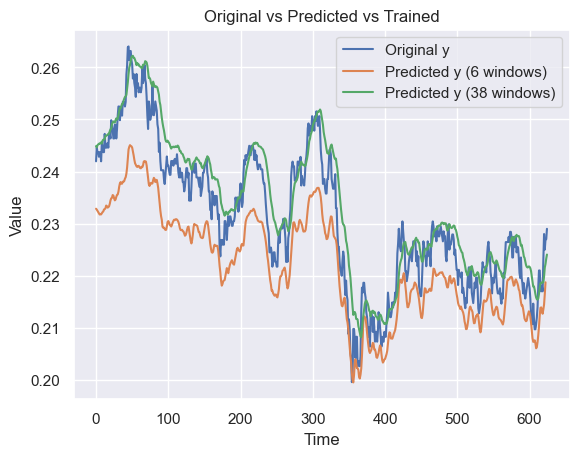

In [65]:
plt.plot(y_test, label='Original y')
plt.plot(p[33:], label='Predicted y (6 windows)')
# Plotting predicted y values
plt.plot(y_pred, label='Predicted y (38 windows)')

plt.legend()
plt.title('Original vs Predicted vs Trained')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

Hence, as can be seen from the graph, the hybrid model, integrating a Long Short-Term Memory network with a Genetic Algorithm , demonstrates superior performance compared to its individual components. The hybrid approach leverages the strengths of both LSTM and GA, combining the deep learning capabilities of LSTM with the optimization power of GA. The LSTM network excels in capturing complex temporal patterns in financial time series data, while the GA aids in determining optimal hyperparameters, specifically the time window size and network topology. By employing the GA to systematically search and refine these parameters, the hybrid model mitigates the need for manual tuning, overcoming the limitations of heuristics-based approaches. This synergy results in a more efficient and adaptive model, capable of learning intricate patterns from the massive dataset. The experimental results validate the effectiveness of the hybrid model, outperforming benchmark models and showcasing its potential as a robust and accurate tool for stock market prediction.

In [66]:
p_train = model.predict(X_train)
p_test= model.predict(X_test)

20/20 [==============================] - 0s 6ms/step


In [71]:
P_lstm_ga =  np.concatenate((p_train,p_test),axis = 0)
#Scale it back
P_lstm_ga = P_lstm_ga*10

# 6. Trading Strategy

In [73]:
# Extract the first six rows of the 'Close' column from the DataFrame
first_six_rows = lstm_df['Close'].head(38)

# Convert the first six rows to a NumPy array (Note: This line does not modify the DataFrame)
first_six_rows.to_numpy()

# Initialize a new column 'Predicted Price' in the DataFrame with zeros
lstm_df['Predicted Price'] = 0

# Assign the first six values of 'Close' to the 'Predicted Price' column
for i in range(38):
    lstm_df['Predicted Price'].iloc[i] = lstm_df['Close'].iloc[i]

# Calculate and assign predicted prices for the remaining rows based on the model output (P)
for i in range(38, len(P_lstm_ga) + 6):
    lstm_df['Predicted Price'].iloc[i] = P_lstm_ga[i-38][0] * 10


# Initialize a new column 'Position' in the DataFrame with zeros
lstm_df['Position'] = 0.0


C:\Users\darki\AppData\Local\Temp\ipykernel_29572\3992685304.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lstm_df['Predicted Price'].iloc[i] = lstm_df['Close'].iloc[i]


In this trading strategy implementation,the strategy utilizes an LSTM model to predict returns, and trading decisions are made based on calculated return percentages incorporating transaction costs. 

A loop iterates through the DataFrame, calculating return percentages between consecutive days and determining trading signals. If the return percentage exceeds 3%, a buying signal is generated, leading to the establishment of a long position. Conversely, if the return percentage falls below -3%, a selling signal is triggered, prompting the initiation of a short position. Otherwise, the strategy maintains the current position. 

In [74]:
lstm_df['Position'] = 0.0
transaction_rate = 0.05

def calculate_return_percentage(initial, final):
    return ((final - initial)-transaction_rate*current_price / initial) * 100

for i in range(1, len(lstm_df)-28):
    current_price = lstm_df['Close'].iloc[i]
    next_price = lstm_df['Close'].iloc[i+28]
    previous_price = lstm_df['Close'].iloc[-1]
    # Calculate the return percentage
    return_percentage = calculate_return_percentage(current_price, next_price)
    p_return_percentage = calculate_return_percentage(previous_price, current_price)
    
    if return_percentage > 3 :
        # Buy with transaction cost
        
        lstm_df['Position'].iloc[i] = 1.0
        print(f"Buy at day {i} with a return of {return_percentage}%")

    elif return_percentage < -3 :
        # Sell with transaction cost
        
        lstm_df['Position'].iloc[i] = -1.0
        print(f"Sell at day {i} with a return of {return_percentage}%")

    else:
        # Stay
        print(f"Stay at day {i} with a return of {return_percentage}%")

    




Sell at day 1 with a return of -6.786834001541138%
Sell at day 2 with a return of -6.340100169181824%
Sell at day 3 with a return of -6.786854863166809%
Sell at day 4 with a return of -6.340147852897644%
Sell at day 5 with a return of -5.446707010269165%
Sell at day 6 with a return of -5.446707010269165%
Sell at day 7 with a return of -5.893431901931763%
Sell at day 8 with a return of -6.786854863166809%
Sell at day 9 with a return of -6.786834001541138%
Sell at day 10 with a return of -6.786854863166809%
Sell at day 11 with a return of -4.553313851356506%
Sell at day 12 with a return of -5.8933961391448975%
Sell at day 13 with a return of -6.340150833129883%
Sell at day 14 with a return of -6.34010910987854%
Sell at day 15 with a return of -6.786834001541138%
Sell at day 16 with a return of -6.340147852897644%
Sell at day 17 with a return of -6.340147852897644%
Sell at day 18 with a return of -5.446668267250061%
Sell at day 19 with a return of -6.340147852897644%
Sell at day 20 with a

Sell at day 1064 with a return of -3.6997306346893315%
Sell at day 1065 with a return of -3.684364557266236%
Sell at day 1066 with a return of -3.6997306346893315%
Sell at day 1067 with a return of -4.303805828094482%
Sell at day 1068 with a return of -3.392546176910401%
Sell at day 1069 with a return of -5.302064418792725%
Sell at day 1070 with a return of -5.302064418792725%
Sell at day 1071 with a return of -5.604045391082764%
Sell at day 1072 with a return of -4.697971343994141%
Sell at day 1073 with a return of -4.093860387802124%
Sell at day 1074 with a return of -4.697935581207275%
Sell at day 1075 with a return of -5.302064418792725%
Sell at day 1076 with a return of -6.812195777893066%
Sell at day 1077 with a return of -5.604128837585449%
Sell at day 1078 with a return of -4.697989225387573%
Sell at day 1079 with a return of -5.0%
Sell at day 1080 with a return of -4.6979594230651855%
Sell at day 1081 with a return of -4.6979594230651855%
Sell at day 1082 with a return of -4.0

Sell at day 2110 with a return of -3.1440663337707524%
Sell at day 2111 with a return of -3.138844966888428%
Sell at day 2112 with a return of -3.1284856796264653%
Sell at day 2113 with a return of -4.715268611907959%
Sell at day 2114 with a return of -3.9219069480896%
Sell at day 2115 with a return of -4.704885482788087%
Sell at day 2116 with a return of -6.286506652832031%
Sell at day 2117 with a return of -6.291668415069582%
Sell at day 2118 with a return of -5.4930853843688965%
Sell at day 2119 with a return of -8.66145372390747%
Sell at day 2120 with a return of -8.66666316986084%
Sell at day 2121 with a return of -11.036460399627686%
Sell at day 2122 with a return of -7.100646495819092%
Sell at day 2123 with a return of -6.296865940093994%
Sell at day 2124 with a return of -4.710118770599365%
Sell at day 2125 with a return of -3.916697502136231%
Sell at day 2126 with a return of -3.9115238189697275%
Sell at day 2127 with a return of -3.9115238189697275%
Sell at day 2128 with a re

Sell at day 3007 with a return of -10.173254013061523%
Sell at day 3008 with a return of -10.20167350769043%
Sell at day 3009 with a return of -6.50296688079834%
Sell at day 3010 with a return of -6.474571228027344%
Sell at day 3011 with a return of -3.6899137496948247%
Stay at day 3012 with a return of 2.850289344787597%
Stay at day 3013 with a return of 0.023002624511718472%
Buy at day 3014 with a return of 9.333653450012207%
Stay at day 3015 with a return of 1.8368673324584959%
Stay at day 3016 with a return of -2.7332830429077153%
Sell at day 3017 with a return of -3.6899137496948247%
Sell at day 3018 with a return of -4.660706520080566%
Stay at day 3019 with a return of -0.933651924133301%
Sell at day 3020 with a return of -3.7182855606079106%
Sell at day 3021 with a return of -8.769683837890625%
Stay at day 3022 with a return of 1.5969467163085935%
Stay at day 3023 with a return of 2.5393915176391597%
Buy at day 3024 with a return of 6.309051513671875%
Stay at day 3025 with a ret

<AxesSubplot:xlabel='Date'>

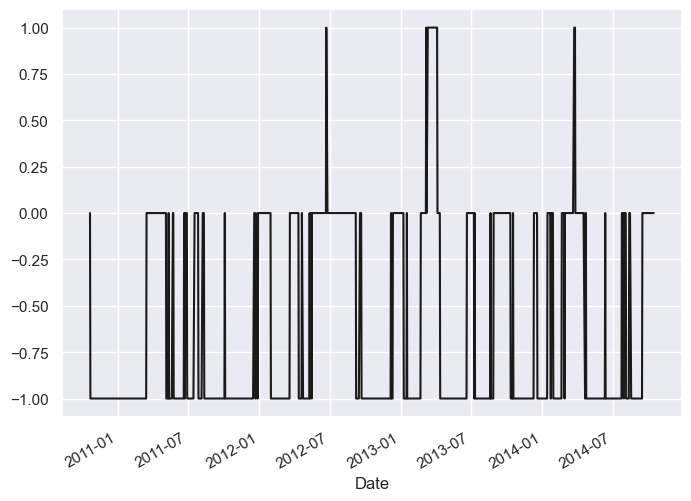

In [75]:
plt.figure(figsize = (8,6))
lstm_df.iloc[0:1000]['Position'].plot(color = 'k', label= 'Position')

-1.0


<AxesSubplot:xlabel='Date'>

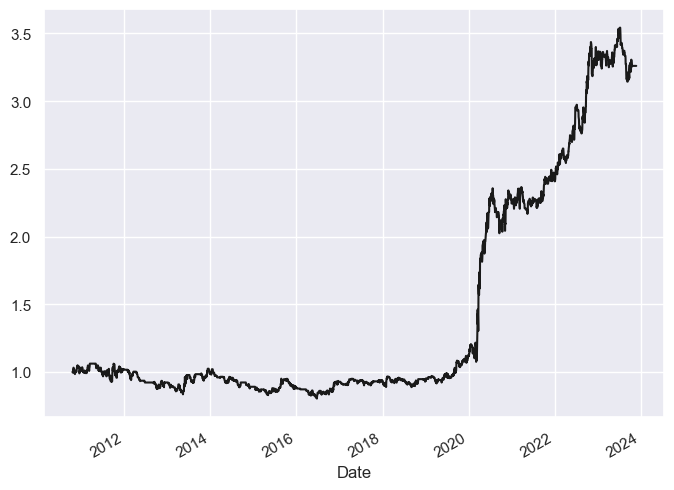

In [78]:
lstm_df['Returns']=1.0
print(lstm_df.iloc[1]['Trade'])

def computereturns(tdf,trate):
  prevrow = tdf.iloc[0]
  returncol=tdf.columns.get_loc('Returns')
  for i in range(len(tdf)):
    if i==0:
      prev_i=i
    else:
      prevrow=tdf.iloc[prev_i]
      row=tdf.iloc[i]
      rt=(row['Close']/prevrow['Close'])-1
      t=prevrow['Returns']*(1+prevrow['Position']*rt)*(1-trate*abs(row['Position']-prevrow['Position']))
      tdf.iat[i,returncol]=t
      prev_i=i
  return tdf

lstm_df=computereturns(lstm_df,0.005)
plt.figure(figsize = (8,6))
lstm_df['Returns']
# df.iloc[1:1000]['Returns'].plot(color = 'k', label= 'Returns')
lstm_df['Returns'].plot(color = 'k', label= 'Returns')

# 7. Future Work

Future work on this trading strategy could involve a comprehensive exploration of hyperparameters for the LSTM model, employing optimization techniques like grid search or randomized search. Additionally, investigating the effectiveness of ensemble models, which combine predictions from multiple models, may enhance the strategy's robustness. The incorporation of dynamic transaction costs that adapt to changing market conditions and the exploration of reinforcement learning techniques for adaptive decision-making represent promising directions. Furthermore, developing and implementing advanced risk management strategies, transitioning the strategy to real-time implementation, and enhancing interpretability and explainability are crucial aspects for refinement. The strategy could benefit from the incorporation of market regime detection mechanisms to adjust its approach based on different market conditions. Lastly, the exploration of additional features and technical indicators, as well as the continual improvement of backtesting frameworks with a diverse set of performance metrics, would contribute to a more sophisticated and adaptive trading strategy.

# 8. NeuroEvolution Investment Making Agent

The goal of the implemented neuroevolutionary algorithm is to train an investment-making agent capable of making informed decisions in financial markets. The algorithm employs a population of neural network models, and through genetic algorithms, seeks to evolve models with optimal parameters for maximizing returns.

In [46]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
sns.set()

In [47]:
ticker = yf.Ticker('ME8U.SI')
neuro_stock_df = ticker.history(period="max")
neuro_stock_df['Trade'] = 0
close = neuro_stock_df.Close.values.tolist()
initial_money = 10000
window_size = 30
skip = 1

novelty_search_threshold = 6
novelty_log_maxlen = 1000
backlog_maxsize = 500
novelty_log_add_amount = 3

In [48]:
neuro_stock_df

Open      High       Low     Close     Volume  \
Date                                                                           
2010-10-21 00:00:00+08:00  0.513717  0.536053  0.513717  0.518184  348314527   
2010-10-22 00:00:00+08:00  0.518184  0.522651  0.495849  0.495849  113018003   
2010-10-25 00:00:00+08:00  0.495849  0.500316  0.482448  0.486914   75151167   
2010-10-26 00:00:00+08:00  0.486914  0.491381  0.469046  0.491381   79694097   
2010-10-27 00:00:00+08:00  0.491381  0.495848  0.482447  0.491381   37594260   
...                             ...       ...       ...       ...        ...   
2023-11-17 00:00:00+08:00  2.250000  2.270000  2.240000  2.270000    3215400   
2023-11-20 00:00:00+08:00  2.270000  2.280000  2.250000  2.270000    2367400   
2023-11-21 00:00:00+08:00  2.270000  2.300000  2.270000  2.290000    5364400   
2023-11-22 00:00:00+08:00  2.290000  2.300000  2.260000  2.290000    4096400   
2023-11-23 00:00:00+08:00  2.280000  2.320000  2.270000  2.310000    4559600   

                           Dividends  Stock Splits  Trade  
Date                                                       
2010-10-21 00:00:00+08:00        0.0           0.0      0  
2010-10-22 00:00:00+08:00        0.0           0.0      0  
2010-10-25 00:00:00+08:00        0.0           0.0      0  
2010-10-26 00:00:00+08:00        0.0           0.0      0  
2010-10-27 00:00:00+08:00        0.0           0.0      0  
...                              ...           ...    ...  
2023-11-17 00:00:00+08:00        0.0           0.0      0  
2023-11-20 00:00:00+08:00        0.0           0.0      0  
2023-11-21 00:00:00+08:00        0.0           0.0      0  
2023-11-22 00:00:00+08:00        0.0           0.0      0  
2023-11-23 00:00:00+08:00        0.0           0.0      0  

[3287 rows x 8 columns]

In [49]:
class neuralnetwork:
    def __init__(self, id_, hidden_size = 128):
        self.W1 = np.random.randn(window_size, hidden_size) / np.sqrt(window_size)
        self.W2 = np.random.randn(hidden_size, 3) / np.sqrt(hidden_size)
        self.fitness = 0
        self.last_features = None
        self.id = id_

def relu(X):
    return np.maximum(X, 0)
    
def softmax(X):
    e_x = np.exp(X - np.max(X, axis=-1, keepdims=True))
    return e_x / np.sum(e_x, axis=-1, keepdims=True)

def feed_forward(X, nets):
    a1 = np.dot(X, nets.W1)
    z1 = relu(a1)
    a2 = np.dot(z1, nets.W2)
    return softmax(a2)

### Buying Process
'buy' method simulates the investment strategy of the agent, considering actions such as buying, selling, or holding assets based on the output of the neural network. Transactions are tracked, and the resulting balance is calculated at each step.

### Evolutionary Process
The evolutionary process involves selecting the fittest individuals from the population, creating a new generation through crossover and mutation, and incorporating a novelty search mechanism to encourage exploration. Fitness is determined based on the returns achieved through simulated investment.

In [50]:
class NeuroEvolution:
    def __init__(self, population_size, mutation_rate, model_generator,
                state_size, window_size, trend, skip, initial_money):
        self.population_size = population_size
        self.mutation_rate = mutation_rate
        self.model_generator = model_generator
        self.state_size = state_size
        self.window_size = window_size
        self.half_window = window_size // 2
        self.trend = trend
        self.skip = skip
        self.initial_money = initial_money
        self.generation_backlog = []
        self.novel_backlog = []
        self.novel_pop = []
        
    def _initialize_population(self):
        self.population = []
        for i in range(self.population_size):
            self.population.append(self.model_generator(i))
    
    def _memorize(self, q, i, limit):
        q.append(i)
        if len(q) > limit:
            q.pop()
    
    def mutate(self, individual, scale=1.0):
        mutation_mask = np.random.binomial(1, p=self.mutation_rate, size=individual.W1.shape)
        individual.W1 += np.random.normal(loc=0, scale=scale, size=individual.W1.shape) * mutation_mask
        mutation_mask = np.random.binomial(1, p=self.mutation_rate, size=individual.W2.shape)
        individual.W2 += np.random.normal(loc=0, scale=scale, size=individual.W2.shape) * mutation_mask
        return individual
    
    def inherit_weights(self, parent, child):
        child.W1 = parent.W1.copy()
        child.W2 = parent.W2.copy()
        return child
    
    def crossover(self, parent1, parent2):
        child1 = self.model_generator((parent1.id+1)*10)
        child1 = self.inherit_weights(parent1, child1)
        child2 = self.model_generator((parent2.id+1)*10)
        child2 = self.inherit_weights(parent2, child2)
        # first W
        n_neurons = child1.W1.shape[1]
        cutoff = np.random.randint(0, n_neurons)
        child1.W1[:, cutoff:] = parent2.W1[:, cutoff:].copy()
        child2.W1[:, cutoff:] = parent1.W1[:, cutoff:].copy()
        # second W
        n_neurons = child1.W2.shape[1]
        cutoff = np.random.randint(0, n_neurons)
        child1.W2[:, cutoff:] = parent2.W2[:, cutoff:].copy()
        child2.W2[:, cutoff:] = parent1.W2[:, cutoff:].copy()
        return child1, child2
    
    def get_state(self, t):
        window_size = self.window_size + 1
        d = t - window_size + 1
        block = self.trend[d : t + 1] if d >= 0 else -d * [self.trend[0]] + self.trend[0 : t + 1]
        res = []
        for i in range(window_size - 1):
            res.append(block[i + 1] - block[i])
        return np.array([res])
    
    def act(self, p, state):
        logits = feed_forward(state, p)
        return np.argmax(logits, 1)[0]
    
    def buy(self, individual):
        initial_money = self.initial_money
        starting_money = initial_money
        state = self.get_state(0)
        inventory = []
        states_sell = []
        states_buy = []
        
        for t in range(0, len(self.trend) - 1, self.skip):
            action = self.act(individual, state)
            next_state = self.get_state(t + 1)
            
            if action == 1 and starting_money >= self.trend[t]:
                inventory.append(self.trend[t])
                initial_money -= self.trend[t]
                states_buy.append(t)
                print('day %d: buy 1 unit at price %f, total balance %f'% (t, self.trend[t], initial_money))
            
            elif action == 2 and len(inventory):
                bought_price = inventory.pop(0)
                initial_money += self.trend[t]
                states_sell.append(t)
                try:
                    invest = ((self.trend[t] - bought_price) / bought_price) * 100
                except:
                    invest = 0
                print(
                    'day %d, sell 1 unit at price %f, investment %f %%, total balance %f,'
                    % (t, self.trend[t], invest, initial_money)
                )
            state = next_state
        
        invest = ((initial_money - starting_money) / starting_money) * 100
        total_gains = initial_money - starting_money
        return states_buy, states_sell, total_gains, invest
    
    def calculate_fitness(self):
        for i in range(self.population_size):
            initial_money = self.initial_money
            starting_money = initial_money
            state = self.get_state(0)
            inventory = []
            
            for t in range(0, len(self.trend) - 1, self.skip):
                action = self.act(self.population[i], state)
                next_state = self.get_state(t + 1)
            
                if action == 1 and starting_money >= self.trend[t]:
                    #Buy
                    cost = self.trend[t] * (1 + 0.005)
                    if starting_money >= cost:
                        inventory.append(self.trend[t])
                        starting_money -= cost

                elif action == 2 and len(inventory):
                    #Sell
                    sold_price = self.trend[t] * (1 - 0.005)
                    bought_price = inventory.pop(0)
                    starting_money += sold_price

                state = next_state
            invest = ((starting_money - initial_money) / initial_money) * 100
            self.population[i].fitness = invest
            self.population[i].last_features = self.population[i].W2.flatten()
    
    def evaluate(self, individual, backlog, pop, k = 4):
        score = 0
        if len(backlog):
            x = np.array(backlog)
            nn = NearestNeighbors(n_neighbors = k, metric = 'euclidean').fit(np.array(backlog))
            d, _ = nn.kneighbors([individual])
            score += np.mean(d)
        
        if len(pop):
            nn = NearestNeighbors(n_neighbors = k, metric = 'euclidean').fit(np.array(pop))
            d, _ = nn.kneighbors([individual])
            score += np.mean(d)
        
        return score
    
    def evolve(self, generations=20, checkpoint= 5):
        self._initialize_population()
        n_winners = int(self.population_size * 0.4)
        n_parents = self.population_size - n_winners
        for epoch in range(generations):
            self.calculate_fitness()
            scores = [self.evaluate(p.last_features, self.novel_backlog, self.novel_pop) for p in self.population]
            sort_fitness = np.argsort(scores)[::-1]
            self.population = [self.population[i] for i in sort_fitness]
            fittest_individual = self.population[0]
            if (epoch+1) % checkpoint == 0:
                print('epoch %d, fittest individual %d with accuracy %f'%(epoch+1, sort_fitness[0], 
                                                                          fittest_individual.fitness))
            next_population = [self.population[i] for i in range(n_winners)]
            total_fitness = np.sum([np.abs(i.fitness) for i in self.population])
            parent_probabilities = [np.abs(i.fitness / total_fitness) for i in self.population]
            parents = np.random.choice(self.population, size=n_parents, p=parent_probabilities, replace=False)
            
            for p in next_population:
                if p.last_features is not None:
                    self._memorize(self.novel_pop, p.last_features, backlog_maxsize)
                    if np.random.randint(0,10) < novelty_search_threshold:
                        self._memorize(self.novel_backlog, p.last_features, novelty_log_maxlen)
                        
            for i in np.arange(0, len(parents), 2):
                child1, child2 = self.crossover(parents[i], parents[i+1])
                next_population += [self.mutate(child1), self.mutate(child2)]
            self.population = next_population
            
            if np.random.randint(0,10) < novelty_search_threshold:
                pop_sorted = sorted(self.population, key=lambda p: p.fitness, reverse=True)
                self.generation_backlog.append(pop_sorted[0])
                print('novel add fittest, score: %f, backlog size: %d'%(pop_sorted[0].fitness, 
                                                                        len(self.generation_backlog)))
                generation_backlog_temp = self.generation_backlog
                if len(self.generation_backlog) > backlog_maxsize:
                    generation_backlog_temp = random.sample(generation_backlog, backlog_maxsize)
                for p in generation_backlog_temp:
                    if p.last_features is not None:
                        self._memorize(self.novel_backlog, p.last_features, novelty_log_maxlen)
                        
        return fittest_individual

In [51]:
population_size = 100
generations = 100
mutation_rate = 0.1
neural_evolve = NeuroEvolution(population_size, mutation_rate, neuralnetwork,
                              window_size, window_size, close, skip, initial_money)

In [52]:
fittest_nets = neural_evolve.evolve(100)

novel add fittest, score: 0.000000, backlog size: 1
novel add fittest, score: 0.355949, backlog size: 2
epoch 5, fittest individual 65 with accuracy -19.313652
novel add fittest, score: 0.210192, backlog size: 3
novel add fittest, score: 0.000000, backlog size: 4
novel add fittest, score: 0.267756, backlog size: 5
novel add fittest, score: 0.000000, backlog size: 6
epoch 10, fittest individual 73 with accuracy -27.478090
novel add fittest, score: 0.000000, backlog size: 7
novel add fittest, score: 0.000000, backlog size: 8
epoch 15, fittest individual 66 with accuracy -21.745299
novel add fittest, score: 0.000000, backlog size: 9
novel add fittest, score: 0.000000, backlog size: 10
epoch 20, fittest individual 78 with accuracy -20.353040
novel add fittest, score: 0.000000, backlog size: 11
novel add fittest, score: 0.000000, backlog size: 12
novel add fittest, score: 0.000000, backlog size: 13
epoch 25, fittest individual 70 with accuracy -46.181832
novel add fittest, score: 0.000000, 

In [53]:
states_buy, states_sell, total_gains, invest = neural_evolve.buy(fittest_nets)

day 2: buy 1 unit at price 0.486914, total balance 9999.513086
day 3: buy 1 unit at price 0.491381, total balance 9999.021704
day 4: buy 1 unit at price 0.491381, total balance 9998.530323
day 5, sell 1 unit at price 0.477980, investment -1.834879 %, total balance 9999.008303,
day 6: buy 1 unit at price 0.477980, total balance 9998.530323
day 7: buy 1 unit at price 0.482447, total balance 9998.047875
day 8: buy 1 unit at price 0.491381, total balance 9997.556494
day 9: buy 1 unit at price 0.495849, total balance 9997.060645
day 10: buy 1 unit at price 0.491381, total balance 9996.569264
day 11: buy 1 unit at price 0.491381, total balance 9996.077882
day 12: buy 1 unit at price 0.500316, total balance 9995.577567
day 13: buy 1 unit at price 0.500316, total balance 9995.077251
day 14: buy 1 unit at price 0.495849, total balance 9994.581402
day 15: buy 1 unit at price 0.495849, total balance 9994.085554
day 16: buy 1 unit at price 0.491381, total balance 9993.594172
day 17: buy 1 unit at 

day 3232: buy 1 unit at price 2.274329, total balance 5818.418720
day 3233: buy 1 unit at price 2.284175, total balance 5816.134545
day 3234: buy 1 unit at price 2.284175, total balance 5813.850370
day 3235: buy 1 unit at price 2.274329, total balance 5811.576040
day 3236: buy 1 unit at price 2.234947, total balance 5809.341093
day 3237: buy 1 unit at price 2.234947, total balance 5807.106146
day 3238: buy 1 unit at price 2.264484, total balance 5804.841663
day 3239: buy 1 unit at price 2.274329, total balance 5802.567333
day 3240: buy 1 unit at price 2.264484, total balance 5800.302850
day 3241: buy 1 unit at price 2.264484, total balance 5798.038366
day 3242: buy 1 unit at price 2.254638, total balance 5795.783728
day 3243: buy 1 unit at price 2.244793, total balance 5793.538935
day 3244: buy 1 unit at price 2.264484, total balance 5791.274451
day 3245: buy 1 unit at price 2.244793, total balance 5789.029659
day 3247: buy 1 unit at price 2.195565, total balance 5786.834094
day 3248: 

In [54]:
for i in states_buy:
    neuro_stock_df['Trade'].iloc[i-1]=1.0
for i in states_sell:
    neuro_stock_df['Trade'].iloc[i-1]=-1.0

C:\Users\darki\AppData\Local\Temp\ipykernel_29572\2152602874.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neuro_stock_df['Trade'].iloc[i-1]=1.0
C:\Users\darki\AppData\Local\Temp\ipykernel_29572\2152602874.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neuro_stock_df['Trade'].iloc[i-1]=-1.0


<AxesSubplot:xlabel='Date'>

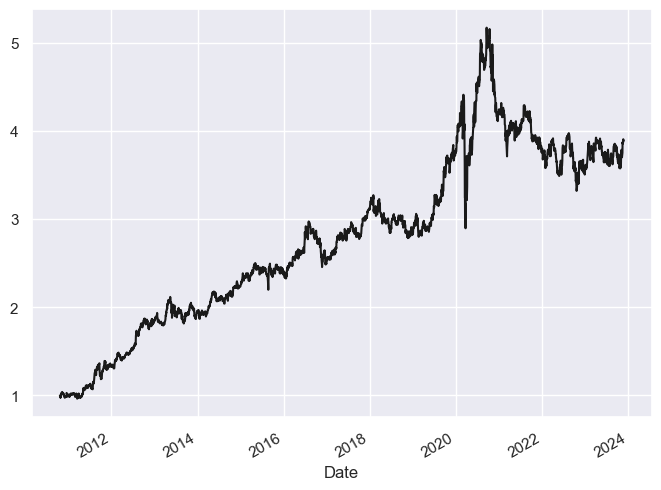

In [55]:
neuro_stock_df['Returns']=1.0

def computereturns(tdf,trate):
  prevrow = tdf.iloc[0]
  returncol=tdf.columns.get_loc('Returns')
  for i in range(len(tdf)):
    if i==0:
      prev_i=i
    else:
      prevrow=tdf.iloc[prev_i]
      row=tdf.iloc[i]
      rt=(row['Close']/prevrow['Close'])-1
      t=prevrow['Returns']*(1+prevrow['Trade']*rt)*(1-trate*abs(row['Trade']-prevrow['Trade']))
      tdf.iat[i,returncol]=t
      prev_i=i
  return tdf

neuro_stock_df=computereturns(neuro_stock_df,0.005)
plt.figure(figsize = (8,6))



#df.iloc[1:1000]['Returns'].plot(color = 'k', label= 'Returns')
neuro_stock_df['Returns'].plot(color = 'k', label= 'Returns')